In [1]:
from deepkernelinv.utils.load_datasets import load
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import invgp

/Users/markvdw/miniconda3/envs/tf2/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:54: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.4.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
class args:
    dataset = "CIFAR10"
    subset_size = None

train, test = load(args)
X, _ = list(zip(*[a for a in tfds.as_numpy(train.take(7))]))
cifar_X = np.stack(X).astype('float64')

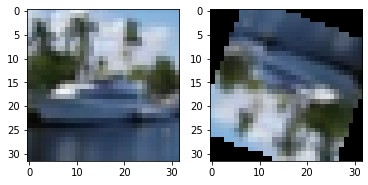

In [3]:
X = cifar_X
orbit = invgp.kernels.orbits.InterpretableSpatialTransform(theta_max=np.array([360., 1., 1., 0., 0.]), colour=True)

Xo = orbit(X).numpy()

show_img_idx = 1
plt.subplot(122)
plt.imshow(Xo[show_img_idx, 2, :, :, :])
plt.subplot(121)
plt.imshow(cifar_X[show_img_idx, :, :, :])
